In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import warnings
warnings.filterwarnings("ignore")

from math import pi

In [61]:
# with open('MyData/YourLibrary.json',encoding="utf8") as f:  
#       data = json.load(f)
# df=pd.DataFrame.from_dict(data,orient='index')
# df = df.transpose()
# df

In [62]:
client_credentials_manager = SpotifyClientCredentials(client_id="d92f12fcff26453fa4a9723203b289bf", client_secret="5847464fd86649e3ac2e0efebeb0aaff")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [63]:
playlist_id='https://open.spotify.com/playlist/37i9dQZF1DZ06evO21GuFq?si=fe059fa75f4540de' #insert your playlist id
results = sp.playlist(playlist_id)

In [64]:
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)
final_df

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,5iq46N6lKkfqKT1HYi4T5I,Eisitiria Dipla,To Metrima,Natassa Bofiliou,False,44,0.525,0.532,2,-5.615,...,0.000000,0.1220,0.4070,98.147,audio_features,spotify:track:5iq46N6lKkfqKT1HYi4T5I,https://api.spotify.com/v1/tracks/5iq46N6lKkfq...,https://api.spotify.com/v1/audio-analysis/5iq4...,3.866883,3
1,3CqlgCreJdeLma3135Mpye,Mehri To Telos,Mehri To Telos,"Gerasimos Evangelatos, Themis Karamouratidis, ...",False,33,0.765,0.485,4,-8.177,...,0.000000,0.3130,0.5900,129.781,audio_features,spotify:track:3CqlgCreJdeLma3135Mpye,https://api.spotify.com/v1/tracks/3CqlgCreJdeL...,https://api.spotify.com/v1/audio-analysis/3Cql...,3.961617,5
2,4CjX0qOTvodVLdeiHIyD0Q,I Epochi Tou Therismou,Koita Me,"Natassa Bofiliou, Themis Karamouratidis, Geras...",False,44,0.649,0.434,5,-7.990,...,0.003390,0.0996,0.3770,96.024,audio_features,spotify:track:4CjX0qOTvodVLdeiHIyD0Q,https://api.spotify.com/v1/tracks/4CjX0qOTvodV...,https://api.spotify.com/v1/audio-analysis/4CjX...,3.243417,4
3,6ECBKSGhLYqLc2rafhN6VE,Oi Meres Tou Fotos,I Kardia Ponaei Otan Psilonei,Natassa Bofiliou,False,42,0.534,0.389,5,-7.005,...,0.000000,0.1000,0.3540,104.200,audio_features,spotify:track:6ECBKSGhLYqLc2rafhN6VE,https://api.spotify.com/v1/tracks/6ECBKSGhLYqL...,https://api.spotify.com/v1/audio-analysis/6ECB...,4.028000,4
4,5O13C7CSJ1GuZFi8NhRzSc,Giro Ap' Ton Ilio,Ena Fili Apo Diosmo,"Manolis Famellos, Natassa Bofiliou",False,34,0.595,0.525,9,-7.943,...,0.000133,0.0931,0.5110,112.400,audio_features,spotify:track:5O13C7CSJ1GuZFi8NhRzSc,https://api.spotify.com/v1/tracks/5O13C7CSJ1Gu...,https://api.spotify.com/v1/audio-analysis/5O13...,4.417067,4
5,5EaMEczDijEH2kA4gXYimA,Mehri To Telos,S' Eho Vri Ke Se Hano,"Gerasimos Evangelatos, Themis Karamouratidis, ...",False,40,0.523,0.348,2,-8.439,...,0.000061,0.1390,0.1470,130.048,audio_features,spotify:track:5EaMEczDijEH2kA4gXYimA,https://api.spotify.com/v1/tracks/5EaMEczDijEH...,https://api.spotify.com/v1/audio-analysis/5EaM...,4.484050,4
6,5A6sSWNhJ5Lhx1vQCcNXmU,Eisitiria Dipla,To Asteri Mou,Natassa Bofiliou,False,29,0.214,0.368,2,-7.695,...,0.000187,0.1460,0.1680,85.448,audio_features,spotify:track:5A6sSWNhJ5Lhx1vQCcNXmU,https://api.spotify.com/v1/tracks/5A6sSWNhJ5Lh...,https://api.spotify.com/v1/audio-analysis/5A6s...,3.721333,5
7,4MGsTph6Ty4yxYMabX1k9G,I Epochi Tou Therismou,I Epochi Tou Therismou,"Natassa Bofiliou, Themis Karamouratidis, Geras...",False,29,0.670,0.347,0,-10.753,...,0.000794,0.1620,0.5600,136.034,audio_features,spotify:track:4MGsTph6Ty4yxYMabX1k9G,https://api.spotify.com/v1/tracks/4MGsTph6Ty4y...,https://api.spotify.com/v1/audio-analysis/4MGs...,3.449100,4
8,6hPjtg4Ci4KfdpuIknjPYm,Tria Mystika,Koita Ego,"Natassa Bofiliou, Themis Karamouratidis, Geras...",False,25,0.527,0.432,2,-9.402,...,0.000000,0.0887,0.1640,129.817,audio_features,spotify:track:6hPjtg4Ci4KfdpuIknjPYm,https://api.spotify.com/v1/tracks/6hPjtg4Ci4Kf...,https://api.spotify.com/v1/audio-analysis/6hPj...,3.975333,4
9,2bq0JBUStJQqICuyKPkSxm,Belle Reve (Live),Stin Epomeni Zoi,"Natassa Bofiliou, Themis Karamouratidis, Geras...",False,25,0.477,0.511,5,-8.302,...,0.000000,0.2880,0.2480,133.864,audio_features,spotify:track:2bq0JBUStJQqICuyKPkSxm,https://api.spotify.com/v1/tracks/2bq0JBUStJQq...,https://api.spotify.com/v1/audio-analysis/2bq0...,3.538883,4


In [65]:
final_df.isna().sum()

id                  0
album               0
name                0
artist              0
explicit            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [66]:
music_feature = features_df [['danceability','energy','loudness','speechiness','acousticness','instrumentalness',
                       'liveness', 'tempo', 'duration_ms', 'valence']]
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,valence
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.522468,0.434787,-8.885064,0.040977,0.450198,0.001288,0.196049,121.284383,3.850680,0.336602
std,0.111154,0.143510,2.264500,0.026038,0.308959,0.005506,0.196483,27.651306,0.638104,0.164510
min,0.214000,0.101000,-16.186000,0.023500,0.027600,0.000000,0.076300,62.302000,2.097117,0.057300
25%,0.471500,0.336000,-10.282500,0.029250,0.172000,0.000000,0.094950,100.896000,3.396167,0.189500
50%,0.527000,0.443000,-8.439000,0.033300,0.379000,0.000026,0.117000,127.706000,3.848000,0.313000
75%,0.576000,0.527500,-7.326500,0.038050,0.679000,0.000177,0.165500,137.465000,4.332867,0.457000
max,0.774000,0.731000,-5.301000,0.158000,0.976000,0.037400,0.826000,180.930000,5.502450,0.776000


In [67]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

In [68]:
music_feature

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,valence
0,0.555357,0.684127,0.971153,0.031227,0.762758,0.000000,0.060958,0.302163,0.519704,0.486573
1,0.983929,0.609524,0.735783,0.084758,0.175453,0.000000,0.315726,0.568829,0.547523,0.741199
2,0.776786,0.528571,0.752963,0.023792,0.022459,0.090642,0.031079,0.284267,0.336619,0.444831
3,0.571429,0.457143,0.843454,0.024535,0.620413,0.000000,0.031613,0.353188,0.567017,0.412829
4,0.680357,0.673016,0.757281,0.011896,0.348376,0.003556,0.022409,0.422312,0.681270,0.631279
5,0.551786,0.392063,0.711713,0.045353,0.652046,0.001628,0.083633,0.571079,0.700940,0.124809
6,0.000000,0.423810,0.780064,0.084015,0.952552,0.005000,0.092971,0.195114,0.476963,0.154028
7,0.814286,0.390476,0.499127,0.072862,0.380008,0.021230,0.114312,0.621540,0.397019,0.699457
8,0.558929,0.525397,0.623243,0.047584,0.429566,0.000000,0.016540,0.569132,0.551551,0.148463
9,0.469643,0.650794,0.724299,0.049071,0.254534,0.000000,0.282380,0.603247,0.423385,0.265340


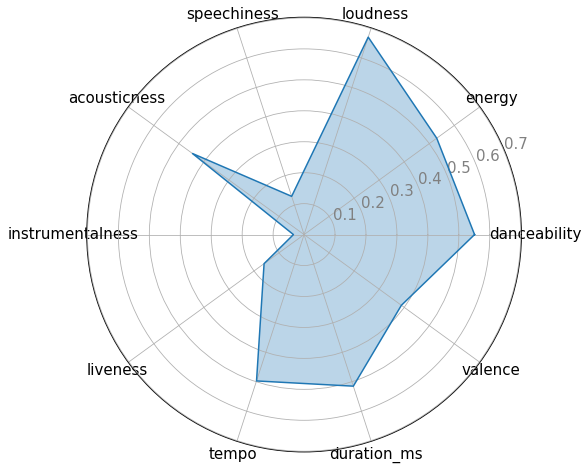

In [69]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

In [70]:
corr_table = music_feature.corr(method="pearson")
corr_table.style.background_gradient(cmap='coolwarm')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,valence
danceability,1.000000,0.164761,0.171271,-0.171655,-0.133556,0.022715,-0.198724,0.144838,-0.194269,0.513984
energy,0.164761,1.000000,0.646594,0.172720,-0.655048,-0.134697,0.144057,0.167672,-0.040677,0.360245
loudness,0.171271,0.646594,1.000000,-0.280404,-0.251485,-0.251336,-0.098648,-0.064831,-0.114857,0.168299
speechiness,-0.171655,0.172720,-0.280404,1.000000,0.019256,-0.091048,0.166125,0.258811,-0.201242,0.241802
acousticness,-0.133556,-0.655048,-0.251485,0.019256,1.000000,-0.154297,-0.287851,-0.252927,-0.144224,-0.097909
instrumentalness,0.022715,-0.134697,-0.251336,-0.091048,-0.154297,1.000000,-0.041522,0.310846,-0.055289,0.114783
liveness,-0.198724,0.144057,-0.098648,0.166125,-0.287851,-0.041522,1.000000,0.022139,0.256624,-0.027247
tempo,0.144838,0.167672,-0.064831,0.258811,-0.252927,0.310846,0.022139,1.000000,0.004720,0.102817
duration_ms,-0.194269,-0.040677,-0.114857,-0.201242,-0.144224,-0.055289,0.256624,0.004720,1.000000,-0.384470
valence,0.513984,0.360245,0.168299,0.241802,-0.097909,0.114783,-0.027247,0.102817,-0.384470,1.000000


In [71]:
music_feature.corrwith(music_feature["valence"]).sort_values(ascending=False)

valence             1.000000
danceability        0.513984
energy              0.360245
speechiness         0.241802
loudness            0.168299
instrumentalness    0.114783
tempo               0.102817
liveness           -0.027247
acousticness       -0.097909
duration_ms        -0.384470
dtype: float64

Text(0, 0.5, 'Valence')

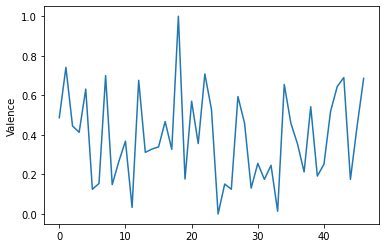

In [72]:
music_feature['valence'].plot()
plt.ylabel("Valence")

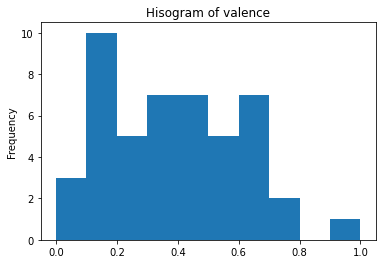

In [73]:
music_feature['valence'].plot(style='k.',kind='hist')
plt.title('Hisogram of valence')
plt.show()

In [74]:
music_feature['valence'].mean()

0.3886212990949972

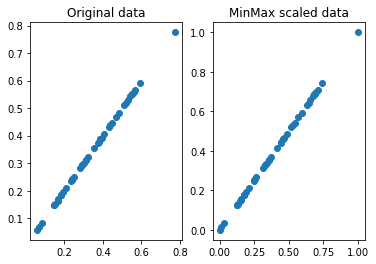

In [75]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(final_df['valence'], final_df['valence'])
axes[0].set_title("Original data")
axes[1].scatter(music_feature['valence'], music_feature['valence'])
axes[1].set_title("MinMax scaled data")
plt.show()

In [76]:
X = music_feature[['danceability', 'energy', 'speechiness', 'liveness', 'acousticness', 'instrumentalness', 'duration_ms']]
#X = music_feature[['danceability', 'energy', 'speechiness', 'liveness']]
y = music_feature['valence']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 7)
(32,)
(15, 7)
(15,)


In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report,r2_score
import sklearn.metrics as metrics

In [80]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
linReg = LinearRegression()
scores = cross_val_score(linReg, X, y, scoring='r2', cv=cv, n_jobs=1)
scores

array([ 0.35710303,  0.13378477, -0.89013012,  0.39082128,  0.11001428])

In [81]:
predicted = cross_val_predict(linReg, X, y, cv=6)
scores = cross_val_score(linReg, X, y, scoring='r2', cv=12, n_jobs=1)
scores

array([ 0.48206717,  0.48849709, -0.37278885,  0.10446084,  0.58497869,
       -1.96853179, -0.67837003,  0.53139099,  0.57604524, -1.20754946,
       -1.03331529, -0.74395893])

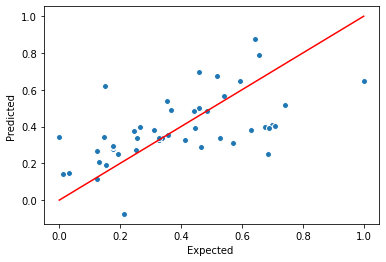

In [82]:
fig,ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(1, 1, 1))
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
ax.set_xlabel('Expected ')
ax.set_ylabel('Predicted ')
plt.show()

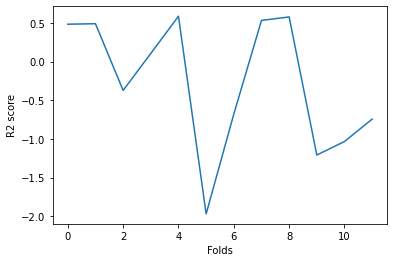

In [83]:
fig,ax = plt.subplots()
plt.plot(scores)
ax.set_xlabel('Folds')
ax.set_ylabel('R2 score')
plt.show()

In [84]:
kf = KFold(n_splits=10, shuffle=True)
scores = []
errors = []
i = 1

for training, testing in kf.split(X, y):
    X_train, X_test = X.loc[training], X.loc[testing]
    y_train, y_test = y.loc[training], y.loc[testing]
    print ('{}/10 Folds {}'.format(i, kf.n_splits))
    print('--------------------------')
    
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    score = metrics.r2_score(y_test, linReg.predict(X_test))
    error = metrics.mean_squared_error(y_test, linReg.predict(X_test))
    print('R2 Score: ', score)
    print('MSE: ', error)
    scores.append(score)
    errors.append(error)
    print('\n')
    i += 1

1/10 Folds 10
--------------------------
R2 Score:  0.13126508753560406
MSE:  0.01301792975358381


2/10 Folds 10
--------------------------
R2 Score:  0.7424745230209644
MSE:  0.02518876185415625


3/10 Folds 10
--------------------------
R2 Score:  -0.6025278884991137
MSE:  0.05769389289999867


4/10 Folds 10
--------------------------
R2 Score:  -0.20285367678096877
MSE:  0.058469906295618455


5/10 Folds 10
--------------------------
R2 Score:  0.23004641559477546
MSE:  0.033830933828413075


6/10 Folds 10
--------------------------
R2 Score:  0.7020788120491908
MSE:  0.012972259842506186


7/10 Folds 10
--------------------------
R2 Score:  0.14495660221902784
MSE:  0.03535282865794841


8/10 Folds 10
--------------------------
R2 Score:  -3.051803574666554
MSE:  0.04186505533143838


9/10 Folds 10
--------------------------
R2 Score:  -1.6206434611413192
MSE:  0.06379079895209659


10/10 Folds 10
--------------------------
R2 Score:  0.8740328594424085
MSE:  0.002024305454807724


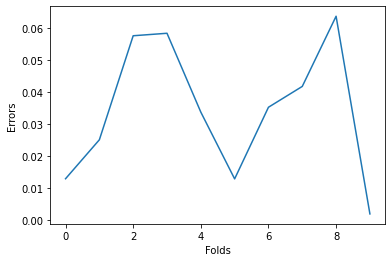

In [85]:
fig, ax = plt.subplots()
plt.plot(errors)
ax.set_xlabel('Folds')
ax.set_ylabel('Errors')
plt.show()

In [86]:
print("Coefficients: \n", linReg.coef_)
print("Intercept: \n", linReg.intercept_)

Coefficients: 
 [ 0.58837395  0.45807825  0.24112024  0.10101709  0.21372987  0.34355826
 -0.25153756]
Intercept: 
 -0.2016915968432611


In [87]:
y_pred_lin = linReg.predict(X_test)
dfp = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred_lin})
dfp.head()

,Actual_Price,Predicted_Price
17,0.326562,0.311621
27,0.593711,0.618058
28,0.458745,0.436762
34,0.654933,0.737382


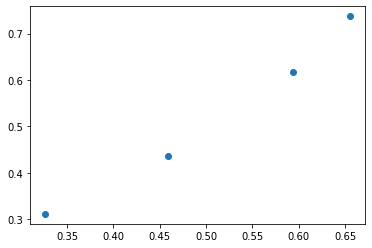

In [88]:
plt.scatter(dfp['Actual_Price'], dfp['Predicted_Price'])

In [89]:
reg_score = linReg.score(X_test, y_test)
print("Linear Regression Score: ", reg_score)
print("Absolute Squared Error: ", mean_absolute_error(y_test, y_pred_lin))
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("Mean Squared Error: ", mse_lin)

Linear Regression Score:  0.8740328594424085
Absolute Squared Error:  0.03593027451735262
Mean Squared Error:  0.002024305454807724


In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data

torch.manual_seed(42)

pd.options.mode.chained_assignment = None 

ModuleNotFoundError: No module named 'torch'